# Multiple-objective portfolio optimization

# INTRODUCTION

-  Your task is to solve a multiple-objective portfolio optimization problem.
-  Use the basic Markowitz's model from 1952 (see Lecture 1)
-  Solve = construct Pareto front approximations.
-  The dataset is the same as for the portfolio game part 1 (bundle1.zip).
-  The dataset consists of the historical prices of 20 assets.
-  The bundle contains 20 files (*.txt) linked to different assets.
-  The name of the file suggests the asset's name.
-  The structure of every file is as follows:
1.  The first line contains the name of the asset.
2. The second line provides the number of data points N.
3. The following N lines are data points with the structure: time, price.
-  The historical timeline for all assets is time $\in$ [0,100].
-  Future predictions should be calculated for time = 200.
-  Goal: 
-  Load data, make predictions, and build the model. 
-  Illustrate your predictions (can be done in the jupyter notebook)
-  Then, implement the WSM and ECM methods (see the tutorial on quadratic programming provided below). 
-  Run your implementations for different calculation limits (e.g., the number of weight vectors for WSM). Compare the methods' efficiency in finding unique Pareto optimal solutions. Finally, illustrate generated Pareto fronts.

# Short tutorial on the cvxopt library for quadratic programming

In [1]:
import numpy as np
from cvxopt import matrix, solvers, sparse

# QP Optimization Problem

### General model:

$max$ $\boldsymbol{cx} - \dfrac{1}{2}\boldsymbol{x}^T\boldsymbol{Qx}$ <br>
$s.t.$ <br>
$\boldsymbol{Gx} \leq \boldsymbol{h}$ <br>
$\boldsymbol{x} \geq \boldsymbol{0}$

### But the library uses the following form:

$min$ $\boldsymbol{cx} + \dfrac{1}{2}\boldsymbol{x}^T\boldsymbol{Qx}$ <br>
$s.t.$ <br>
$\boldsymbol{Gx} \leq \boldsymbol{h}$ <br>
$\boldsymbol{Ax} = \boldsymbol{b}$ <br>

### Exmple

$min$ $2x^2_1+x_2^2+x_1x_2+x_1+x_2$ <br>
$s.t.$ <br>
$x_1 \geq 0$<br>
$x_2 \geq 0$<br>
$x_1 + x_2 = 1$<br>

### Hence:

In [2]:
Q = matrix([ [4.0, 1.0], [1.0, 2.0] ]) ## [4, 1] is 1st column, not row!

In [3]:
c = matrix([1.0, 1.0]) ### (1, 2) = dimensions (1 row and 2 columns)

In [4]:
A = matrix([1.0, 1.0], (1,2)) ### (1, 2) = dimensions (1 row and 2 columns)

In [5]:
b = matrix(1.0) 

In [6]:
G = matrix([[-1.0,0.0],[0.0,-1.0]]) ### multiplied both sides by -1

In [7]:
h = matrix([0.0,0.0]) ### multiplied both sides by -1

In [8]:
solQP=solvers.qp(Q, c, G, h, A, b)

     pcost       dcost       gap    pres   dres
 0:  1.8889e+00  7.7778e-01  1e+00  2e-16  2e+00
 1:  1.8769e+00  1.8320e+00  4e-02  2e-16  6e-02
 2:  1.8750e+00  1.8739e+00  1e-03  2e-16  5e-04
 3:  1.8750e+00  1.8750e+00  1e-05  1e-16  5e-06
 4:  1.8750e+00  1.8750e+00  1e-07  1e-16  5e-08
Optimal solution found.


In [9]:
print(solQP.keys())

dict_keys(['x', 'y', 's', 'z', 'status', 'gap', 'relative gap', 'primal objective', 'dual objective', 'primal infeasibility', 'dual infeasibility', 'primal slack', 'dual slack', 'iterations'])


In [10]:
print(solQP['x'])
print(solQP['primal objective'])

[ 2.50e-01]
[ 7.50e-01]

1.875000000000018


# We can also solve LP problems:

$min$ $\boldsymbol{c}\boldsymbol{x}$ <br>
$s.t.$ <br>
$\boldsymbol{Gx} \leq \boldsymbol{h}$ <br>
$\boldsymbol{Ax} = \boldsymbol{b}$ (optional)

### Exmple

$min$ $2x_1+x_2$ <br>
$s.t.$ <br>
$-x_1 +x_2 \leq 1$ <br>
$x_1 + x_2 \geq 2$ <br>
$x_2 \geq 0$<br>
$x_1 - 2x_2 \leq 4$

In [11]:
G = matrix([ [-1.0, -1.0, 0.0, 1.0], [1.0, -1.0, -1.0, -2.0] ])
h = matrix([ 1.0, -2.0, 0.0, 4.0 ])
c = matrix([ 2.0, 1.0 ])
solLP = solvers.lp(c,G,h)  
###!!!! OPTIONALLY A and b can be provided (equality constraints) as in solQP=solvers.qp(Q, c, G, h, A, b)

     pcost       dcost       gap    pres   dres   k/t
 0:  2.6471e+00 -7.0588e-01  2e+01  8e-01  2e+00  1e+00
 1:  3.0726e+00  2.8437e+00  1e+00  1e-01  2e-01  3e-01
 2:  2.4891e+00  2.4808e+00  1e-01  1e-02  2e-02  5e-02
 3:  2.4999e+00  2.4998e+00  1e-03  1e-04  2e-04  5e-04
 4:  2.5000e+00  2.5000e+00  1e-05  1e-06  2e-06  5e-06
 5:  2.5000e+00  2.5000e+00  1e-07  1e-08  2e-08  5e-08
Optimal solution found.


In [12]:
print(solLP.keys())

dict_keys(['x', 'y', 's', 'z', 'status', 'gap', 'relative gap', 'primal objective', 'dual objective', 'primal infeasibility', 'dual infeasibility', 'primal slack', 'dual slack', 'residual as primal infeasibility certificate', 'residual as dual infeasibility certificate', 'iterations'])


In [13]:
print(solLP['x'])
print(solLP['primal objective'])

[ 5.00e-01]
[ 1.50e+00]

2.499999989554308


# Portfolio optimization

In [14]:
from pathlib import Path
import logging

import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from prophet import Prophet
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import PolynomialFeatures

from asset import Asset


/home/marek/mambaforge/envs/moo/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
Importing plotly failed. Interactive plots will not work.


In [15]:
sns.set_theme()


In [16]:
ASSETS_DIR = Path("data/Bundle1/")
ASSETS = [Asset(asset_path) for asset_path in ASSETS_DIR.iterdir() if asset_path.suffix == ".txt"]

In [17]:
asset = ASSETS[4]
asset.name


'CPU-XYZ'

In [18]:
def get_expected_return(asset: Asset, last_no: int = 25, plot: bool = False) -> float:
    X = np.array(list(range(len(asset.data_points)))).reshape(-1, 1)
    y = np.array(asset.data_points)

    lin_reg = LinearRegression()
    lin_reg.fit(X[-last_no:], y[-last_no:])

    X_future = np.array(list(range(len(asset.data_points) + last_no))).reshape(-1, 1)
    last_pred = max(lin_reg.predict(X_future)[-1], 0) # Predicted value can't be negative

    if plot:
        plt.plot(X, y, "b.")
        plt.plot(X_future, lin_reg.predict(X_future), "r-")
        plt.show()

    return round((last_pred - y[-1]) / y[-1], 4)

In [19]:
def format_to_range(expected_results: np.array):
    # Format results to range [-1, 1]
    min_val = min(expected_results)
    max_val = max(expected_results)

    return 2 * (expected_results - min_val) / (max_val - min_val) - 1


def get_expected_return_prophet(asset: Asset, plot: bool = False) -> float:
    m = Prophet()
    data = asset.data_points

    df = pd.DataFrame({"y": data, "ds": pd.date_range("2023-01-01", periods=len(data), freq="D")})

    # Disable prophet and cmdstanpy logging
    logging.getLogger("prophet").setLevel(logging.ERROR)
    logging.getLogger("cmdstanpy").setLevel(logging.ERROR)

    m.fit(df)

    future = m.make_future_dataframe(periods=100)
    forecast = m.predict(future)

    if plot:
        m.plot(forecast)
        plt.show()

    yhat = forecast["yhat"].values[-1]
    yhat_lower = forecast["yhat_lower"].values[-1]
    yhat_upper = forecast["yhat_upper"].values[-1]

    diff = yhat_upper + yhat_lower - 2 * yhat

    last = data[-1]

    return round((yhat + diff - last) / last, 4)

In [20]:
expected_results = []
for asset in ASSETS:
    expected_results.append(get_expected_return_prophet(asset))

expected_results = format_to_range(np.array(expected_results))
expected_results


23:58:55 - cmdstanpy - INFO - Chain [1] start processing
23:58:55 - cmdstanpy - INFO - Chain [1] done processing


array([ 0.91025249,  0.48940606, -1.        ,  0.08872316,  0.5326085 ,
       -0.18670141,  0.48077994,  0.63418097,  0.66746338,  0.87592776,
        0.91629077,  0.48351155,  0.32550993,  0.5963339 ,  0.48613532,
        0.55424566,  0.83146734,  1.        ,  0.59007997,  0.89361129])

In [21]:
ASSETS_MATRIX = np.array([ASSETS[i].data_points for i in range(20)]) 

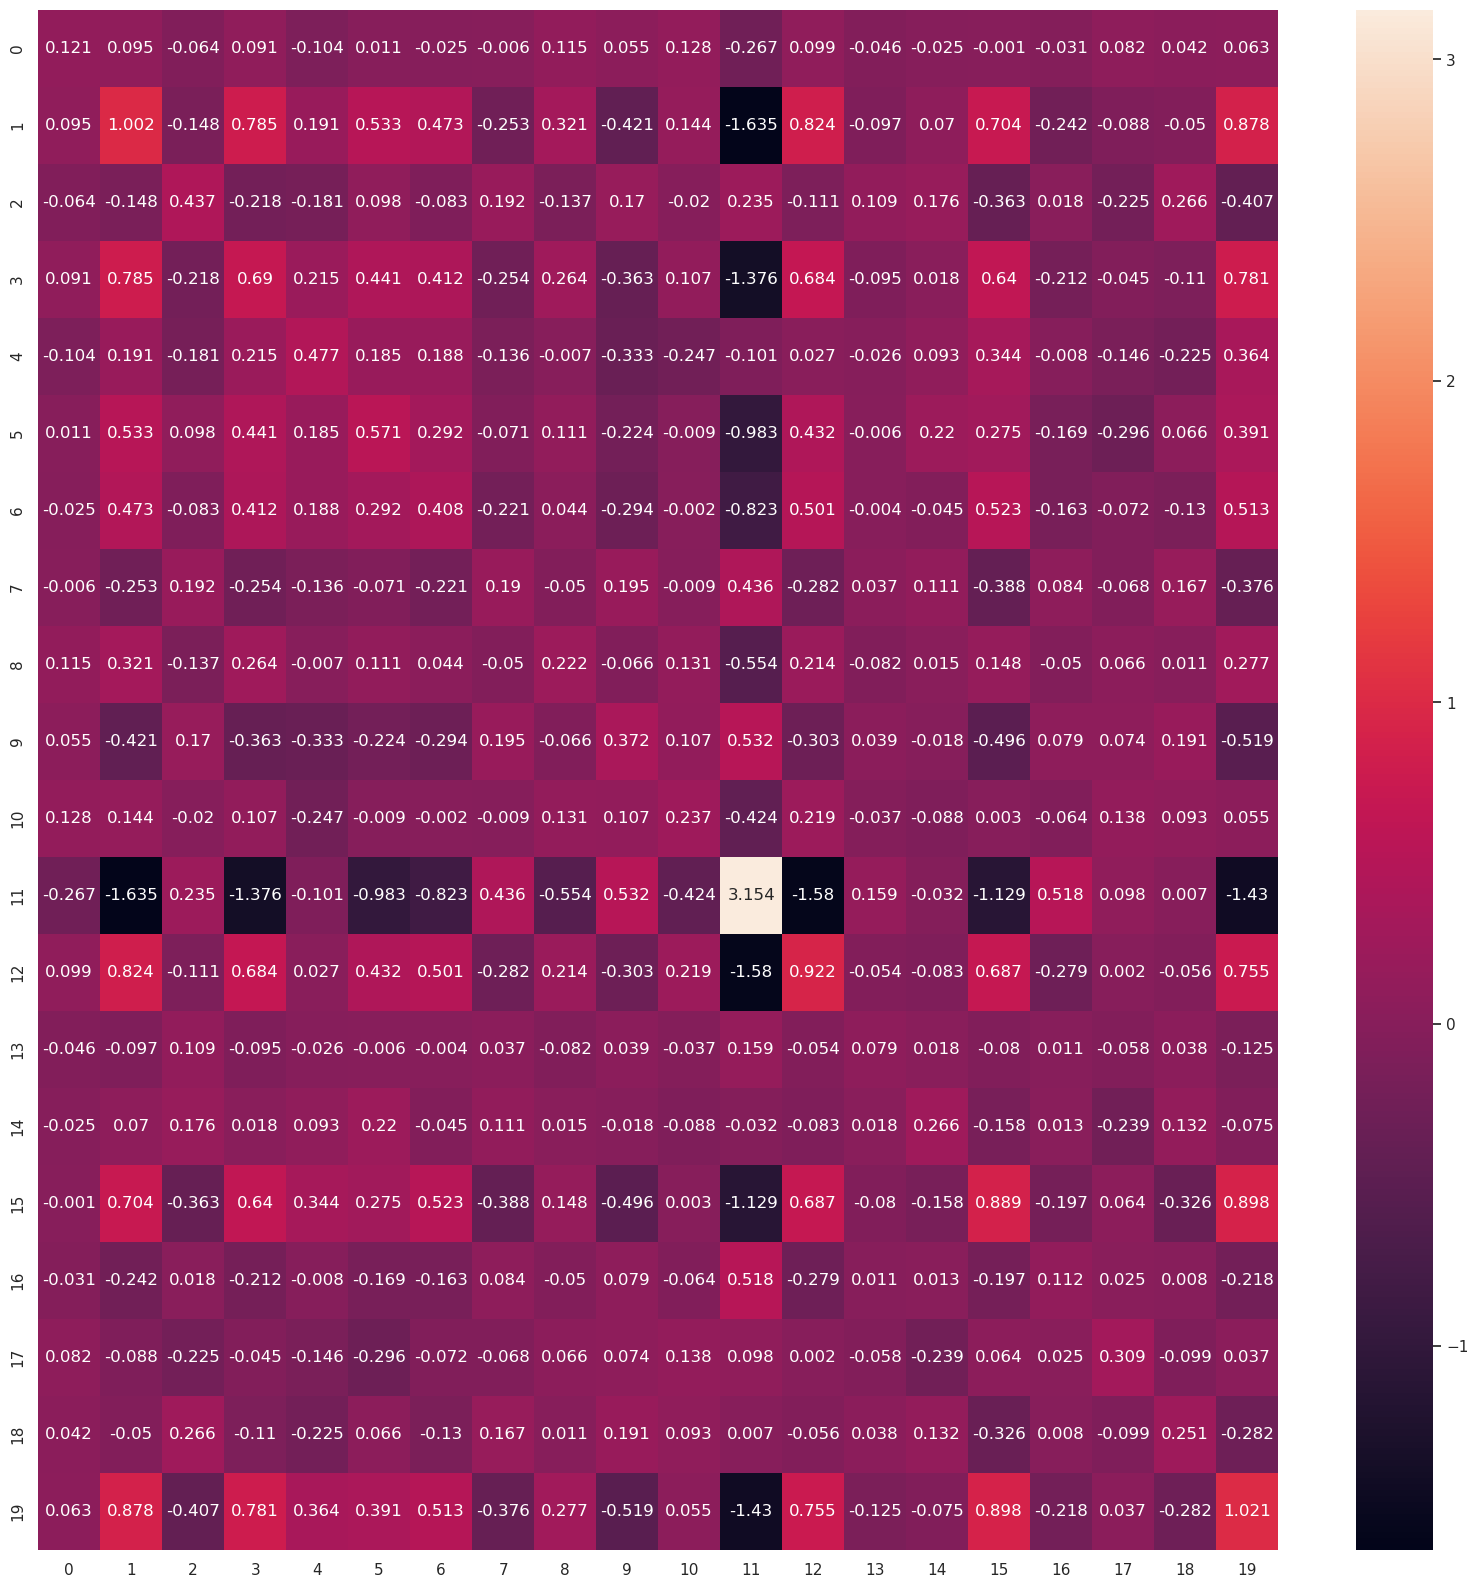

In [22]:
cov_matrix = np.round(np.cov(ASSETS_MATRIX, bias=True), 3)
plt.figure(figsize=(20, 20))
sns.heatmap(cov_matrix, annot=True, fmt='g')
plt.show()

In [23]:
# A = matrix([1, 1, ..., 1]) (1x20)
# b = matrix([1, 1, ..., 1]) (20x1)

# G = -I (20x20)
# h = matrix([0, 0, ..., 0]) (20x1)

# c = Return (20x1)
# Q = Covariance (20x20)

In [24]:
A = matrix(np.ones(20)).T
b = matrix(1.0)

G = matrix(-np.eye(20))
h = matrix(np.zeros(20))

c = matrix(-expected_results)
Q = matrix(cov_matrix)

In [25]:
solQP = solvers.qp(Q, c, G, h, A, b)


     pcost       dcost       gap    pres   dres
 0: -2.9533e+00 -2.1126e+00  5e+01  9e+00  2e+00
 1: -9.4823e-01 -1.8144e+00  3e+00  3e-01  7e-02
 2: -7.5643e-01 -1.1277e+00  4e-01  2e-16  4e-16
 3: -8.3714e-01 -9.0629e-01  7e-02  2e-16  3e-16
 4: -8.7651e-01 -8.8612e-01  1e-02  6e-17  3e-16
 5: -8.8415e-01 -8.8436e-01  2e-04  7e-17  2e-16
 6: -8.8429e-01 -8.8429e-01  2e-06  7e-17  3e-16
 7: -8.8429e-01 -8.8429e-01  2e-08  2e-16  1e-16
Optimal solution found.


In [26]:
arr = np.array(solQP['x'])
arr_round = np.round(arr, 5)

invest = []
for ind, elem in enumerate(arr_round):
    elem, = elem
    if elem < 0.0001:
        continue

    invest.append((ind, elem))

x = solQP['x']

print("Primal objective:", solQP['primal objective'])
print(f"\nTotal expected return: {-np.dot(c.T, x).flatten()[0]}")
print(f"Total expected risk: {0.5 * np.dot(x.T, np.dot(Q, x)).flatten()[0]}")
print(f"Number of assets to invest in: {len(invest)}")

Primal objective: -0.8842922523466181

Total expected return: 0.9348161935209844
Total expected risk: 0.05052394117436628
Number of assets to invest in: 5


In [27]:
for ind, elem in invest:
    print(f"{ASSETS[ind].name} - {elem}")

ABCDE - 0.2468
MarsProject - 0.13676
SpaceNow - 0.08194
SuperFuture - 0.4193
WorldNow - 0.1152


### Dates from 2023-01-01 to 2023-04-11 represent the [0; 100] time interval.
### Dates from 2023-04-12 to 2023-07-20 represent the [100; 200] time interval.

Invest in:
-----------------

 0 - ABCDE       : 0.2468


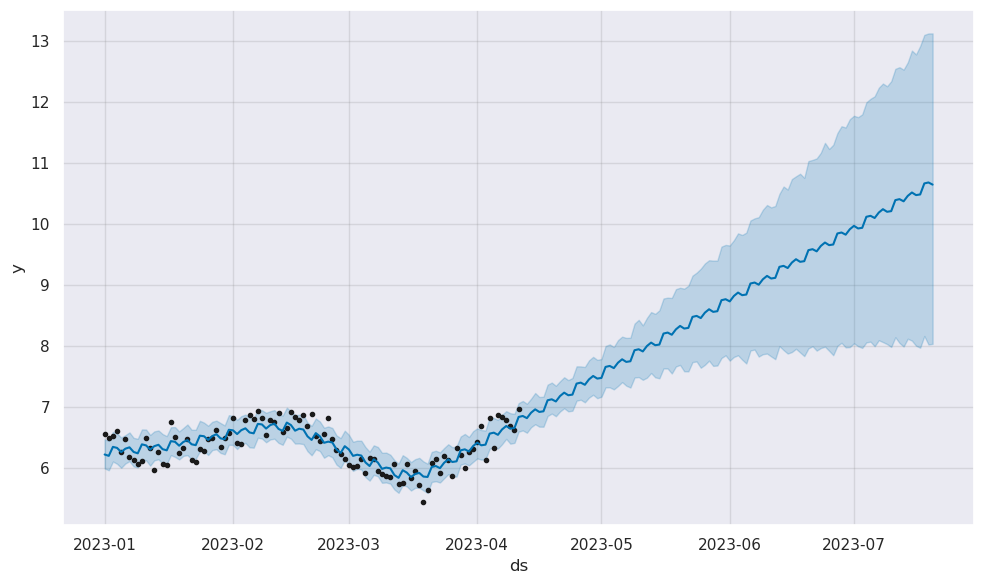

 9 - MarsProject : 0.13676


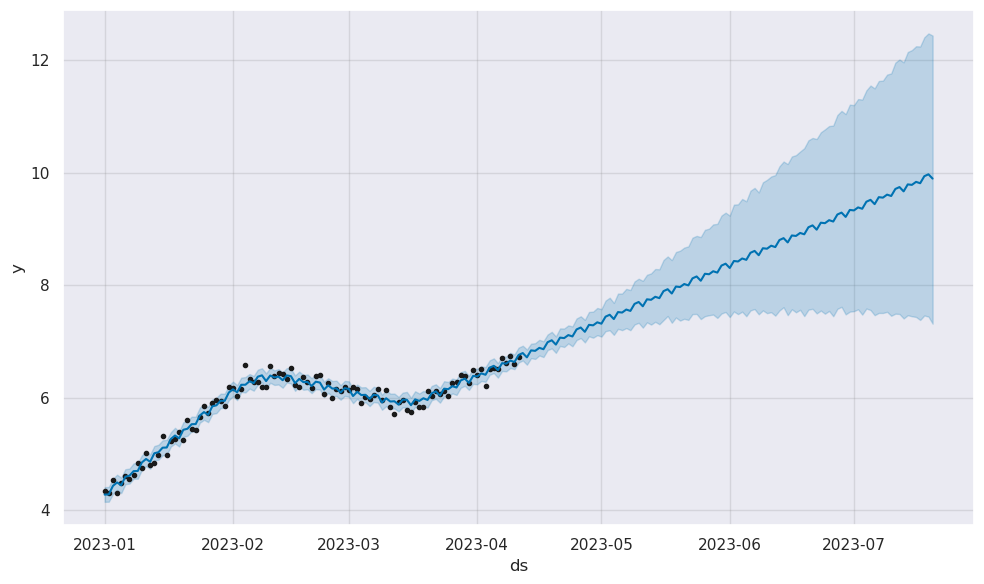

16 - SpaceNow    : 0.08194


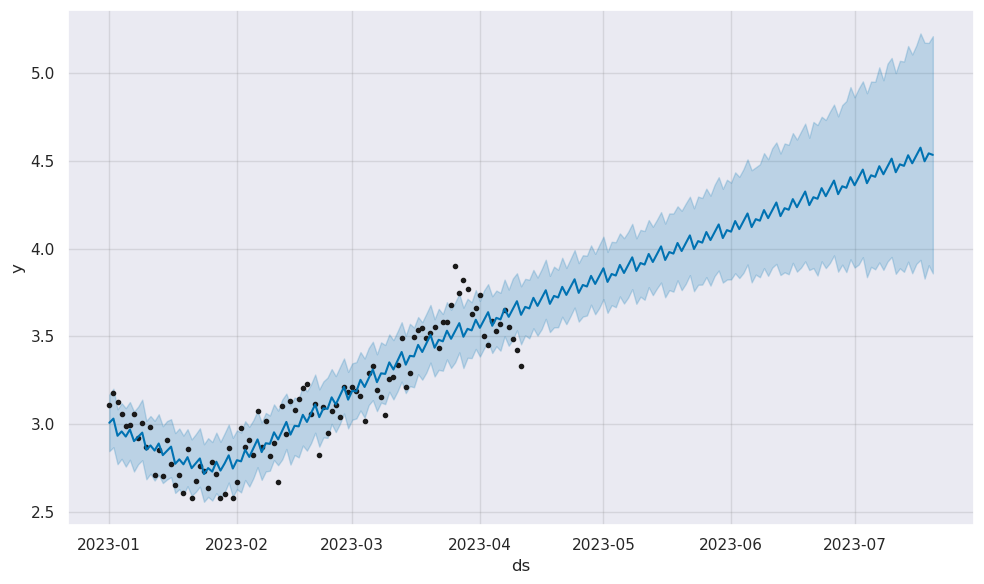

17 - SuperFuture : 0.4193


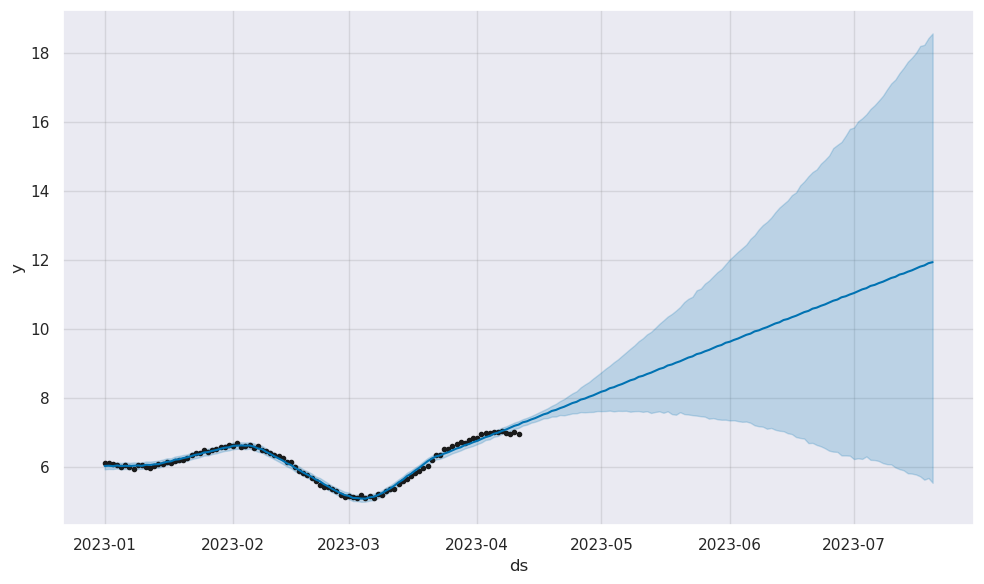

19 - WorldNow    : 0.1152


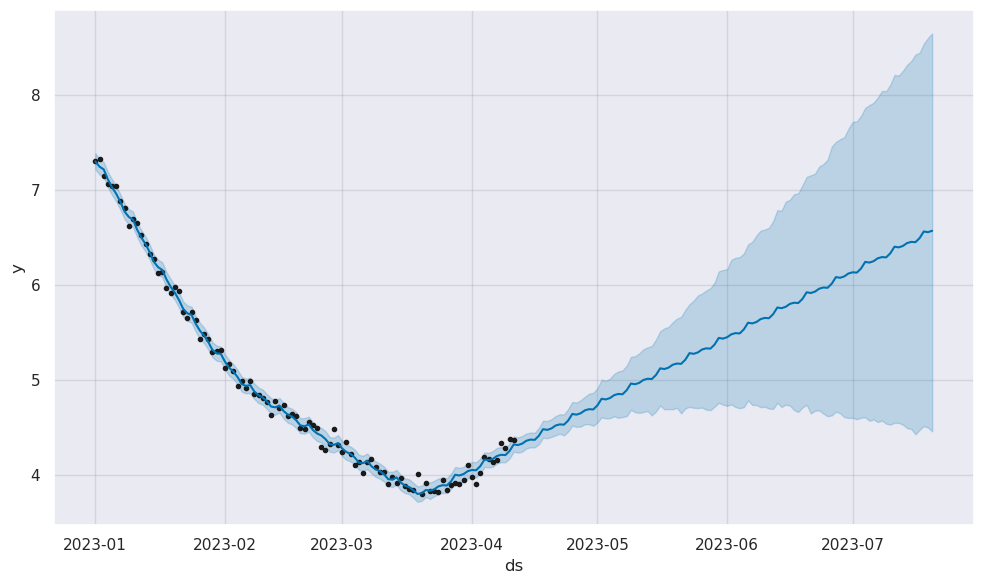

In [28]:
print("Invest in:\n-----------------\n")
for ind, elem in invest:
    print(f"{ind:2} - {ASSETS[ind].name:12}: {elem}")
    _ = get_expected_return_prophet(ASSETS[ind], plot=True)

<h2> <center> Justification of the weights: </center> </h2>

Weights are selected by using Markowitz's model from 1952. The only difference we introduced was instead of using linear regression to calculate expected return we used prophet model to fit the data (from the entire time interval [0; 100]) and we used it to predict the next interval [100; 200].

The prediction gives us three values: yhat_upper, yhat and yhat_lower. The parameter yhat is the expected return at the end of the interval. Parameters yhat_upper and yhat_lower are used to calculate the variance - upper and lower limit.

The final expected return value is calculated as follows:

```
diff = yhat_upper + yhat_lower - 2 * yhat

round((yhat + diff - last) / last, 4)
```

where "diff" is the difference between the upper and expected return and lower and expected return. The "last" parameter is the last value of the asset price at the end of the interval [0; 100].

After all the expected returns are calculated, their values are scalled between -1 and 1 to make better predictions.

# Weighted Sum Method

In [29]:
weights1 = [(1 / j, 1 - 1 / j) for j in range(1, 50)]
weights2 = [(1 - 1 / j, 1 / j) for j in range(1, 50)]
weights = weights1 + weights2

# Remove duplicates
weights = sorted(list(set(weights)), key=lambda x: x[0])


In [30]:
A = matrix(np.ones(20)).T
b = matrix(1.0)

G = matrix(-np.eye(20))
h = matrix(np.zeros(20))

c = matrix(-expected_results)
Q = matrix(cov_matrix)

In [31]:
solvers.options['show_progress'] = False


In [32]:
result = []
for ind, w in enumerate(weights):
    wc, wq = w

    solQP = solvers.qp(wq*Q, wc*c, G, h, A, b)
    arr = np.array(solQP["x"])
    arr_round = np.round(arr, 5)

    x = solQP["x"]
    exp_ret = -np.round(np.dot(c.T, x), 4).flatten()[0]
    risk = np.round(0.5 * np.dot(x.T, np.dot(Q, x)), 4).flatten()[0]
    result.append((exp_ret, risk))


In [33]:
result = sorted(list(set(result)), key=lambda x: x[0])

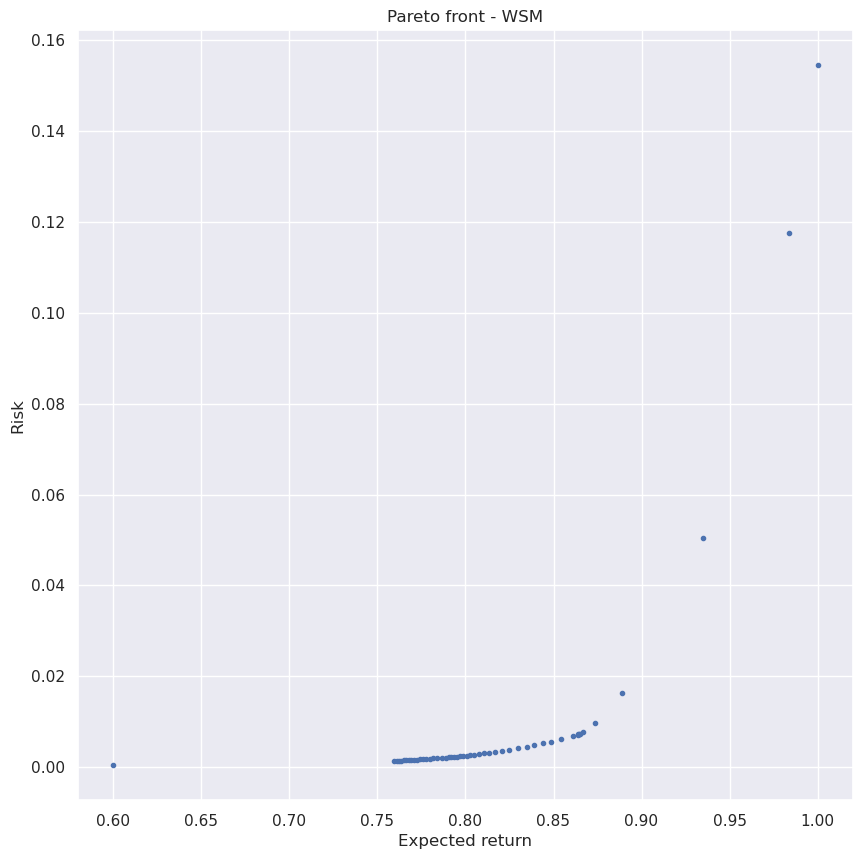

In [34]:
plt.figure(figsize=(10, 10))
plt.plot([x[0] for x in result], [x[1] for x in result], "b.")
plt.xlabel("Expected return")
plt.ylabel("Risk")
plt.title("Pareto front - WSM")
plt.show()

# Epsilon-constrained method

In [35]:
A = matrix(np.ones(20)).T
b = matrix(1.0)

G_mod = matrix([G, matrix(-expected_results, (1, 20))])

c = matrix(np.zeros(20))
Q = matrix(cov_matrix)

In [37]:
h_values = np.round(np.linspace(0, 1, 100), 4)
h_values

array([0.    , 0.0101, 0.0202, 0.0303, 0.0404, 0.0505, 0.0606, 0.0707,
       0.0808, 0.0909, 0.101 , 0.1111, 0.1212, 0.1313, 0.1414, 0.1515,
       0.1616, 0.1717, 0.1818, 0.1919, 0.202 , 0.2121, 0.2222, 0.2323,
       0.2424, 0.2525, 0.2626, 0.2727, 0.2828, 0.2929, 0.303 , 0.3131,
       0.3232, 0.3333, 0.3434, 0.3535, 0.3636, 0.3737, 0.3838, 0.3939,
       0.404 , 0.4141, 0.4242, 0.4343, 0.4444, 0.4545, 0.4646, 0.4747,
       0.4848, 0.4949, 0.5051, 0.5152, 0.5253, 0.5354, 0.5455, 0.5556,
       0.5657, 0.5758, 0.5859, 0.596 , 0.6061, 0.6162, 0.6263, 0.6364,
       0.6465, 0.6566, 0.6667, 0.6768, 0.6869, 0.697 , 0.7071, 0.7172,
       0.7273, 0.7374, 0.7475, 0.7576, 0.7677, 0.7778, 0.7879, 0.798 ,
       0.8081, 0.8182, 0.8283, 0.8384, 0.8485, 0.8586, 0.8687, 0.8788,
       0.8889, 0.899 , 0.9091, 0.9192, 0.9293, 0.9394, 0.9495, 0.9596,
       0.9697, 0.9798, 0.9899, 1.    ])

In [38]:
result = []
for h_value in h_values:
    h_mod = matrix(np.concatenate([h, matrix([-h_value])]))
    solQP = solvers.qp(Q, c, G_mod, h_mod, A, b)
    x = solQP["x"]
    
    exp_ret = np.round(np.dot(expected_results, x), 4).flatten()[0]
    risk = np.round(0.5 * np.dot(x.T, np.dot(Q, x)), 4).flatten()[0]

    result.append((exp_ret, risk))
    

In [39]:
result = sorted(list(set(result)), key=lambda x: x[0])

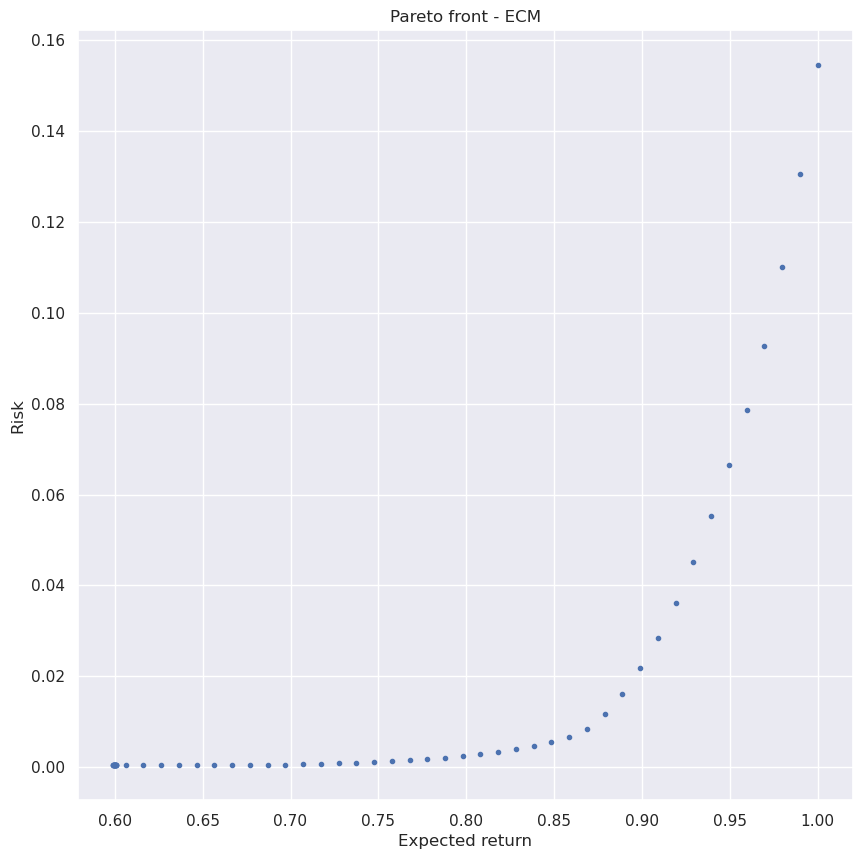

In [40]:
plt.figure(figsize=(10, 10))
plt.plot([x[0] for x in result], [x[1] for x in result], "b.")
plt.xlabel("Expected return")
plt.ylabel("Risk")
plt.title("Pareto front - ECM")
plt.show()